In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2025-12-01 13:21:40.282200: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-01 13:21:40.282745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-01 13:21:40.284630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-01 13:21:40.298356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 13:21:42.819292: W tensorflow/comp

In [2]:
data = pd.read_csv('/work/Final_data.csv')
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [4]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


In [29]:
data["Workout"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: Workout
Non-Null Count  Dtype 
--------------  ----- 
20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [38]:
data["Workout"].describe()

count         20000
unique           53
top       Leg press
freq            423
Name: Workout, dtype: object

In [53]:
data["Workout"].value_counts()

Workout
Leg press                      423
Bird dog                       422
Preacher curls                 413
Decline dumbbell flyes         413
Standing calf raises           404
Incline dumbbell press         398
Cable crossovers               396
Crunches                       395
Triceps dips                   394
Face pulls                     393
Dumbbell flyes                 391
Wrist curl                     391
Incline cable crossovers       390
Skull crushers                 389
Seated cable rows              389
Hanging leg raises             388
Russian twists                 387
Plate pinch                    387
Barbell squats                 386
Bent-over lateral raises       385
Bicep Curls                    385
Triceps pushdowns              384
Barbell rows                   384
Barbell curls                  383
Hammer curl                    382
Leg curls                      382
Leg raises                     382
Seated calf raises             381
Hyperextensi

## Distribusi Usia Pengguna

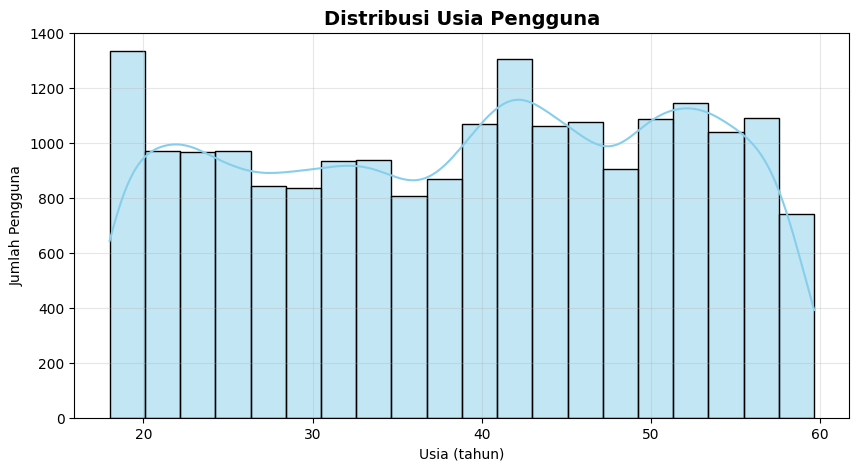

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Pengguna', fontsize=14, fontweight='bold')
plt.xlabel('Usia (tahun)')
plt.ylabel('Jumlah Pengguna')
plt.grid(True, alpha=0.3)
plt.show()

## Korelasi Berat Badan dan Tinggi Badan

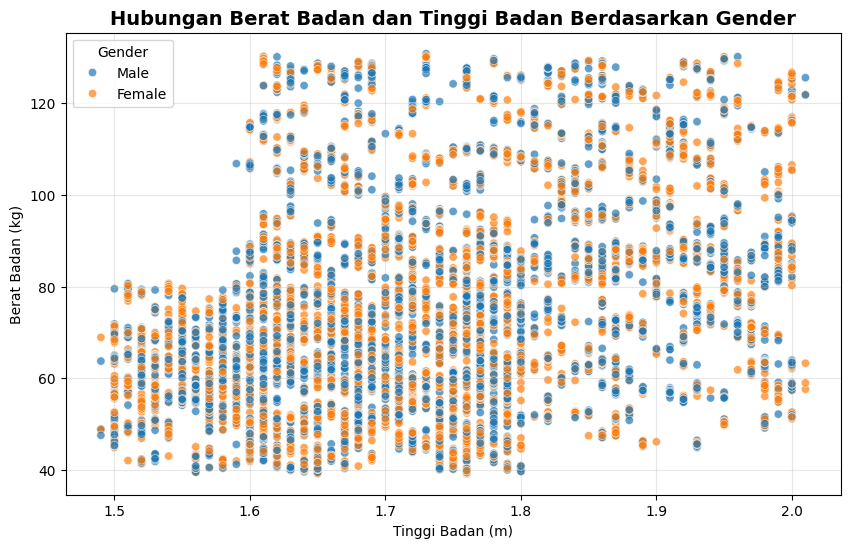

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Height (m)', y='Weight (kg)', hue='Gender', alpha=0.7)
plt.title('Hubungan Berat Badan dan Tinggi Badan Berdasarkan Gender', fontsize=14, fontweight='bold')
plt.xlabel('Tinggi Badan (m)')
plt.ylabel('Berat Badan (kg)')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.show()

## Distribusi BMI dengan Kategori WHO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


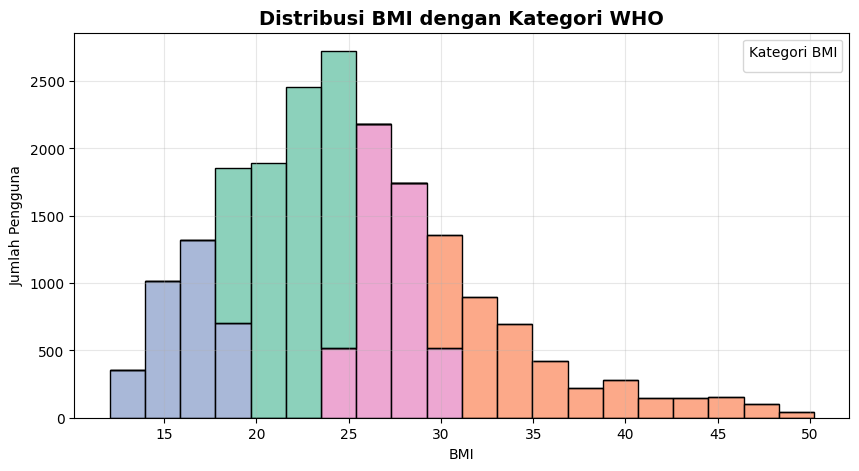


📊 Jumlah pengguna per kategori BMI:
BMI_Category
Normal         7705
Obese          3945
Overweight     4957
Underweight    3393
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(10, 5))

# Buat kategori BMI sederhana
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data['BMI_Category'] = data['BMI'].apply(bmi_category)

# Plot
sns.histplot(data=data, x='BMI', hue='BMI_Category', multiple='stack', bins=20, palette='Set2')
plt.title('Distribusi BMI dengan Kategori WHO', fontsize=14, fontweight='bold')
plt.xlabel('BMI')
plt.ylabel('Jumlah Pengguna')
plt.legend(title='Kategori BMI')
plt.grid(True, alpha=0.3)
plt.show()

# Tampilkan jumlah per kategori
print("\n📊 Jumlah pengguna per kategori BMI:")
print(data['BMI_Category'].value_counts().sort_index())

## Kalori Terbakar per Jenis Latihan

/tmp/ipykernel_3936/3130539660.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Workout_Type', y='Calories_Burned', palette='Set3')


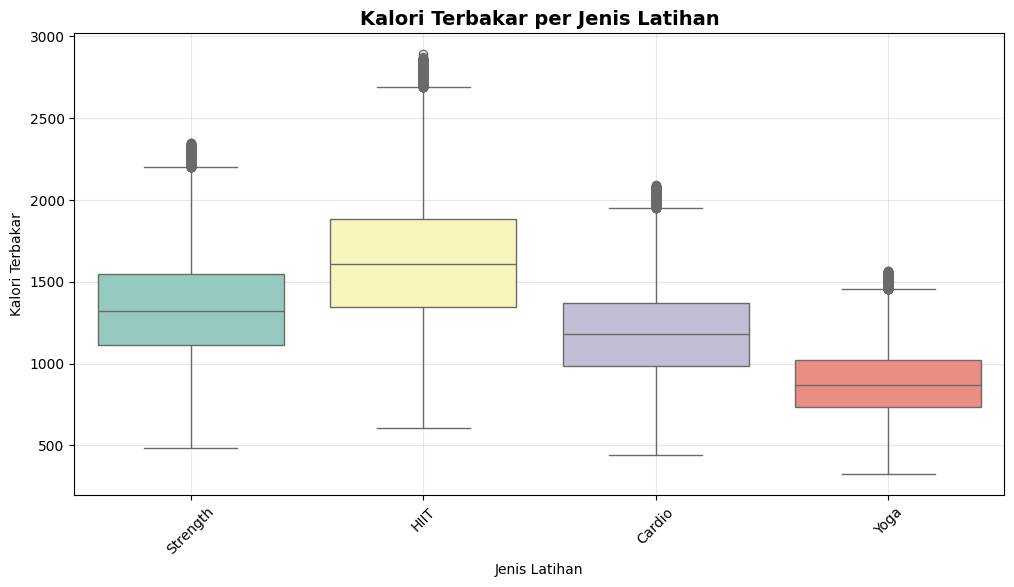

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Workout_Type', y='Calories_Burned', palette='Set3')
plt.title('Kalori Terbakar per Jenis Latihan', fontsize=14, fontweight='bold')
plt.xlabel('Jenis Latihan')
plt.ylabel('Kalori Terbakar')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

## Kalori Asupan dan Kalori Terbakar

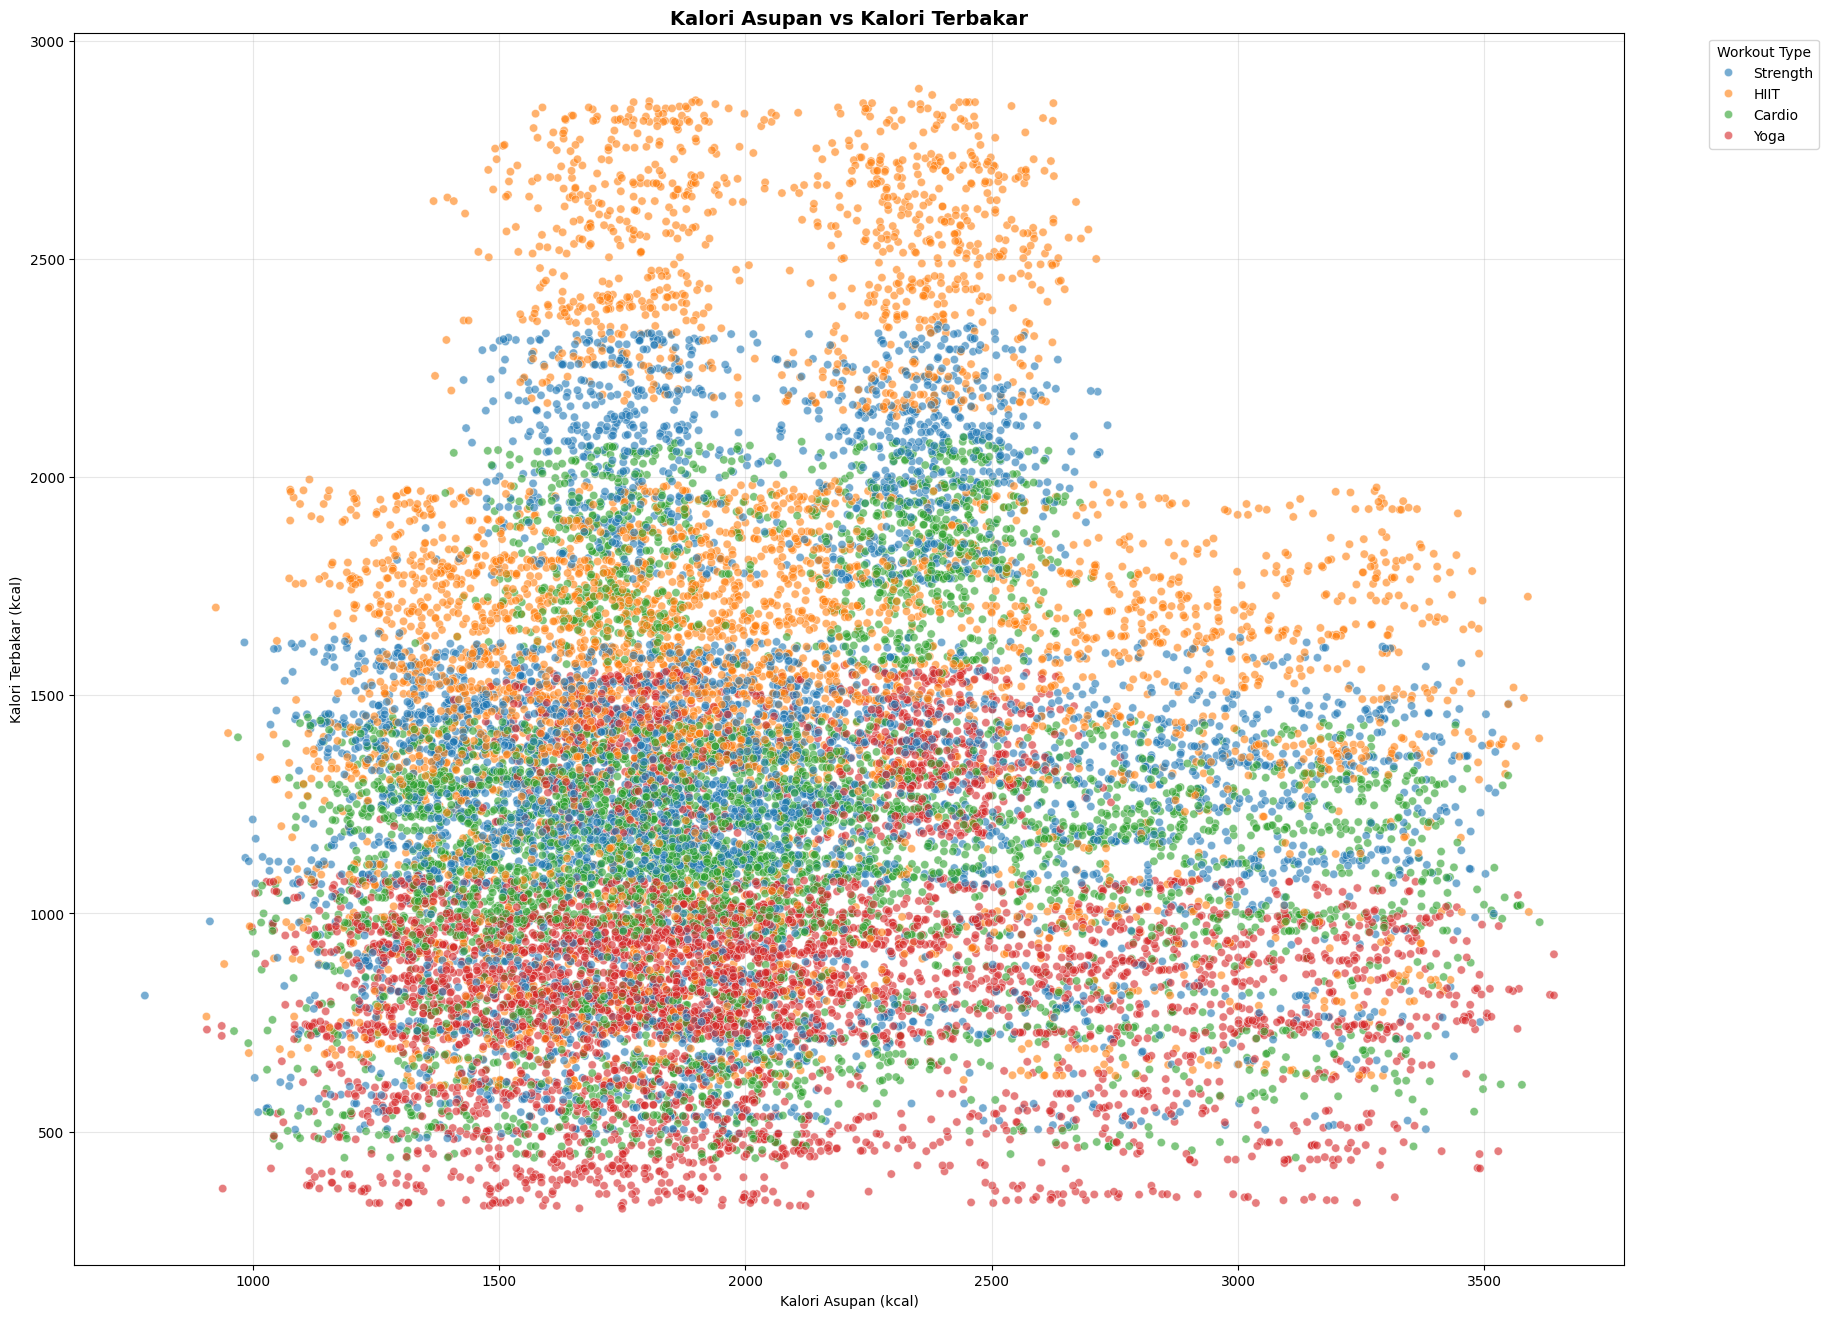

In [10]:
plt.figure(figsize=(20, 16))
sns.scatterplot(data=data, x='Calories', y='Calories_Burned', hue='Workout_Type', alpha=0.6)
plt.title('Kalori Asupan vs Kalori Terbakar', fontsize=14, fontweight='bold')
plt.xlabel('Kalori Asupan (kcal)')
plt.ylabel('Kalori Terbakar (kcal)')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

## Rata Rata Klaori Terbakar per Frekuensi Mingguan

/tmp/ipykernel_3936/894230387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cal_by_freq, x='Workout_Frequency (days/week)', y='Calories_Burned', palette='Blues_d')


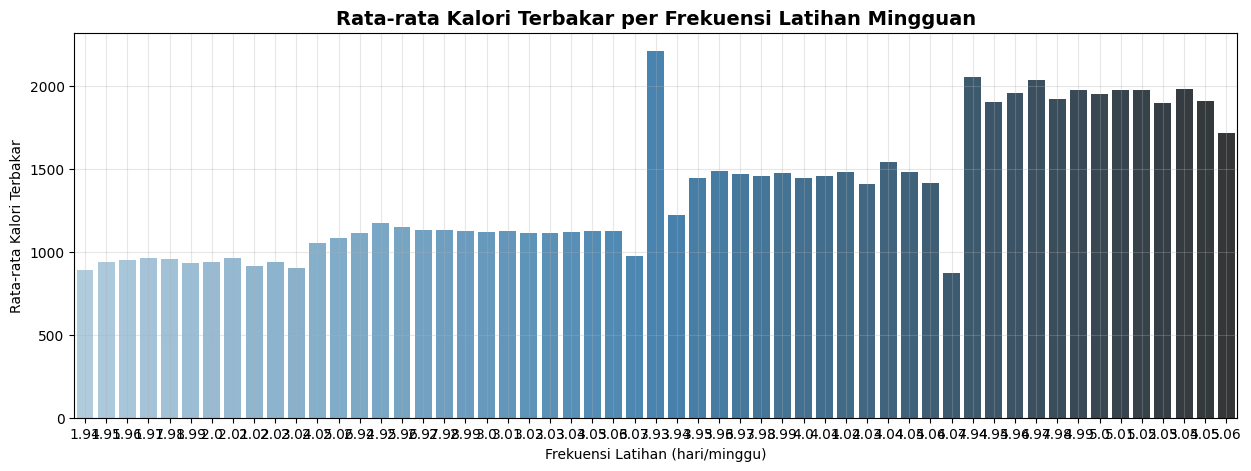


📊 Rata-rata Kalori Terbakar per Frekuensi Latihan:


,Workout_Frequency (days/week),Calories_Burned
0,1.94,889.070000
1,1.95,936.387727
2,1.96,949.439524
3,1.97,964.545347
4,1.98,958.147932
5,1.99,930.291851
6,2.00,941.445282
7,2.01,960.708051
8,2.02,914.313542
9,2.03,938.752561


In [47]:
avg_cal_by_freq = data.groupby('Workout_Frequency (days/week)')['Calories_Burned'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=avg_cal_by_freq, x='Workout_Frequency (days/week)', y='Calories_Burned', palette='Blues_d')
plt.title('Rata-rata Kalori Terbakar per Frekuensi Latihan Mingguan', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi Latihan (hari/minggu)')
plt.ylabel('Rata-rata Kalori Terbakar')
plt.grid(True, alpha=0.3)
plt.show()

print("\n📊 Rata-rata Kalori Terbakar per Frekuensi Latihan:")
display(avg_cal_by_freq)

/tmp/ipykernel_3936/647627602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diet_counts.index, y=diet_counts.values, palette='Pastel1')


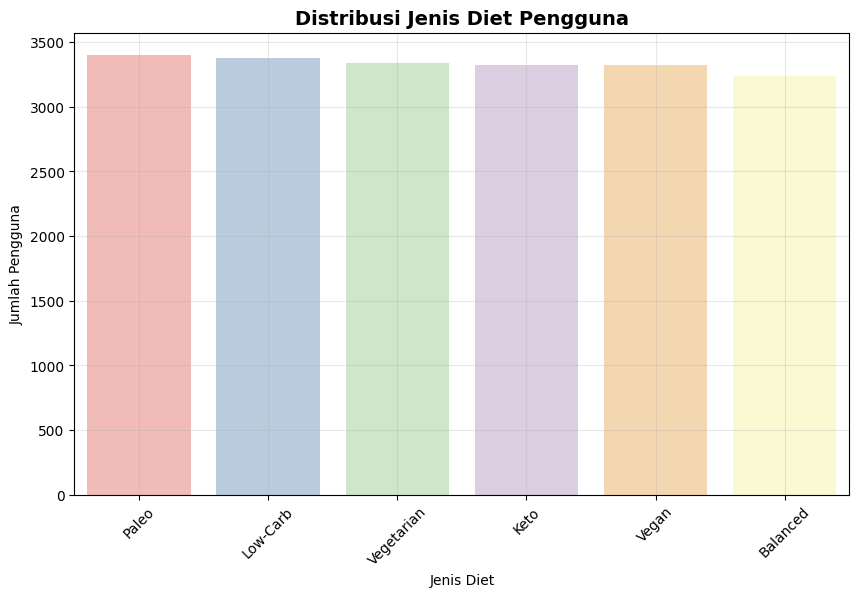


📊 Jumlah pengguna per jenis diet:
diet_type
Paleo         3403
Low-Carb      3379
Vegetarian    3337
Keto          3324
Vegan         3323
Balanced      3234
Name: count, dtype: int64


In [50]:
plt.figure(figsize=(10, 6))
diet_counts = data['diet_type'].value_counts()
sns.barplot(x=diet_counts.index, y=diet_counts.values, palette='Pastel1')
plt.title('Distribusi Jenis Diet Pengguna', fontsize=14, fontweight='bold')
plt.xlabel('Jenis Diet')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print("\n📊 Jumlah pengguna per jenis diet:")
print(diet_counts)

/tmp/ipykernel_3936/1149201944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


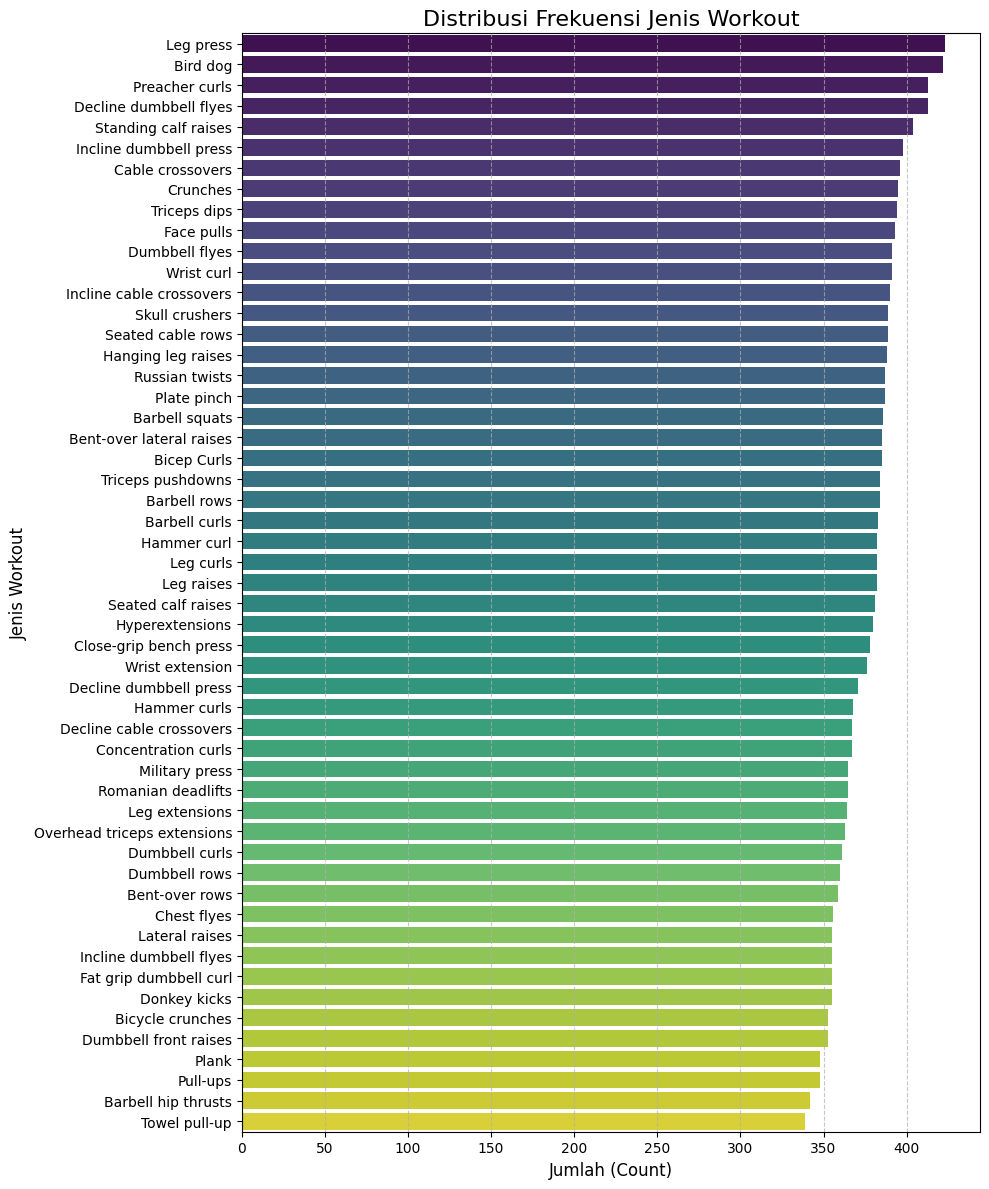

In [62]:
workout_counts = data["Workout"].value_counts().reset_index()
workout_counts.columns = ['Workout', 'Frequency']

plt.figure(figsize=(10, 12)) 

sns.barplot(
    data=workout_counts, 
    x='Frequency', 
    y='Workout', 
    palette='viridis' # Pilihan warna: 'viridis', 'magma', 'blues', 'coolwarm'
)

plt.title('Distribusi Frekuensi Jenis Workout', fontsize=16)
plt.xlabel('Jumlah (Count)', fontsize=12)
plt.ylabel('Jenis Workout', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Garis bantu tipis
plt.tight_layout() # Agar layout rapi tidak terpotong
plt.show()

/tmp/ipykernel_3936/465149008.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target[corr_with_target_sorted.index], palette='viridis')


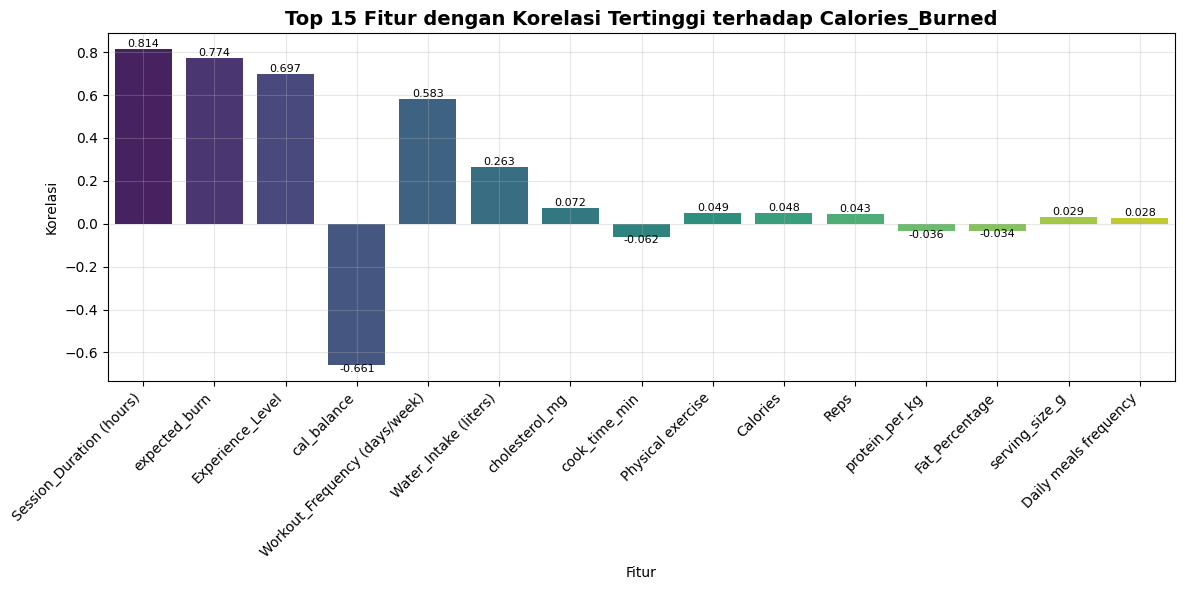

In [68]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = data[numeric_cols].corr()

corr_with_target = corr_matrix['Calories_Burned'].drop('Calories_Burned')

corr_with_target_sorted = corr_with_target.abs().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
bars = sns.barplot(x=corr_with_target_sorted.index, y=corr_with_target[corr_with_target_sorted.index], palette='viridis')
plt.title('Top 15 Fitur dengan Korelasi Tertinggi terhadap Calories_Burned', fontsize=14, fontweight='bold')
plt.xlabel('Fitur')
plt.ylabel('Korelasi')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

for i, v in enumerate(corr_with_target[corr_with_target_sorted.index]):
    bars.text(i, v + 0.01 if v >= 0 else v - 0.03, f'{v:.3f}', color='black', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

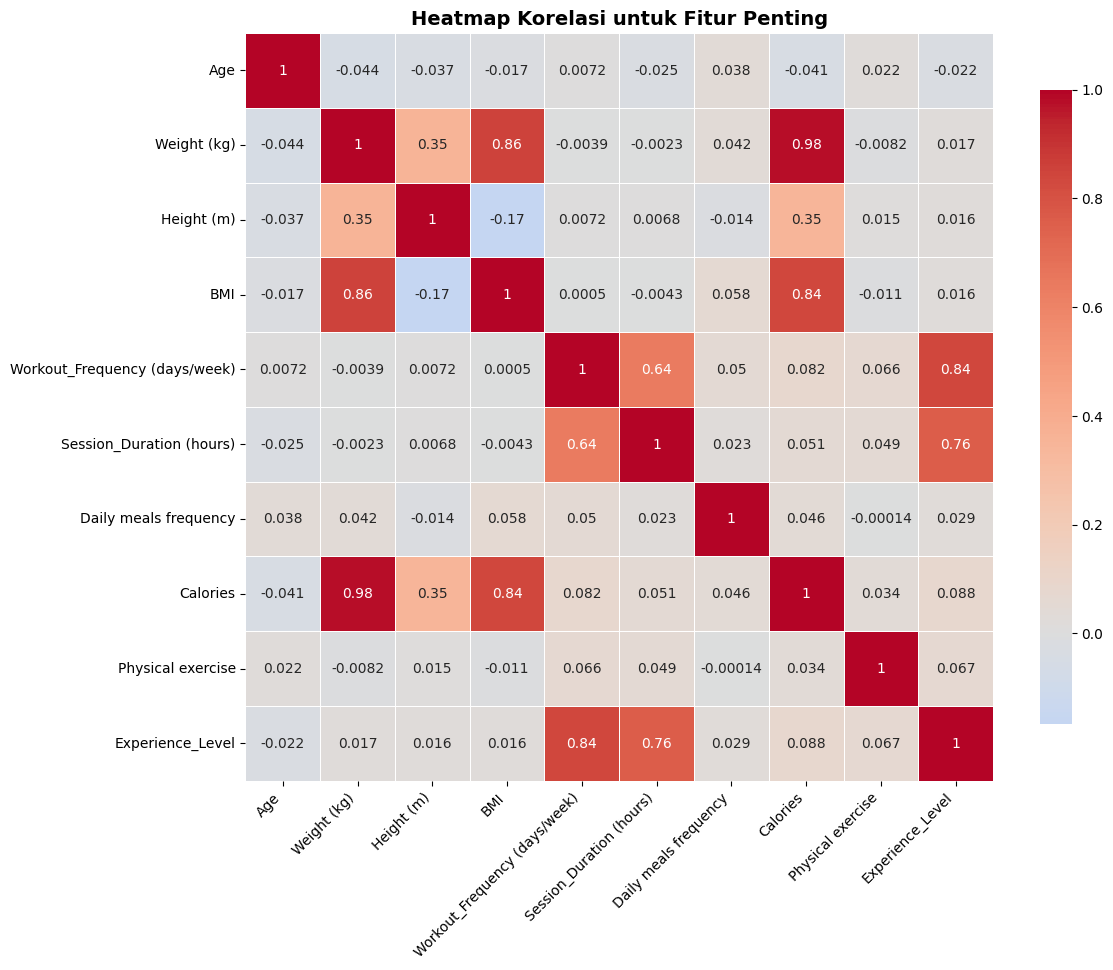

In [71]:
important_features = [
        'Age', 
        'Gender', 
        'Weight (kg)', 
        'Height (m)', 
        'BMI',
        'Workout_Frequency (days/week)', 
        'Session_Duration (hours)', 
        'Workout_Type',
        'Daily meals frequency', 
        'diet_type', 
        'Calories', 
        'Physical exercise',
        'Experience_Level', 
    ]

important_features = [col for col in important_features if col in numeric_cols]

corr_subset = data[important_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_subset,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)
plt.title('Heatmap Korelasi untuk Fitur Penting', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=209310e2-eb5a-41e9-a9b8-e31c4303b8d1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>